In [4]:
import numpy as np
import math
import random
from prettytable import PrettyTable
import matplotlib.pyplot as plt

## Testovací funkce

In [9]:
# 1st DeJong function

def dejong1(x):
    return sum([i**2 for i in x])

# 2st DeJong function
# f2(x)=sum(100·(x(i+1)-x(i)^2)^2+(1-x(i))^2)
#   i=1:n-1; -2.048<=x(i)<=2.048.
def dejong2(x):
    d = len(x)
    suma = 0
    i=0
    for i in range(d-1):
        xi = x[i]
        xnext = x[i+1]
        new = 100 * (xnext - xi**2)**2 + (xi-1)**2
        suma += new
    return suma 

# Schweffel function
def schweffel(x):
    d = len(x)
    suma = 0
    for i in range(d):
        xi = x[i]
        suma += xi * math.sin(math.sqrt(abs(xi)))
    return (418.9829 * d - suma)
    
    

## Algoritmy

In [82]:
# Random Search

def random_search(n_iterations, cost_function, dimensions, area ):
    best_solution = np.random.uniform(-area, area, dimensions)
    best_fitness = cost_function(best_solution)
    history = [best_fitness]

    for i in range(n_iterations):
        solution = [np.random.uniform(-(area), area) for i in range(dimensions)]
        fitness = cost_function(solution)

        if fitness < best_fitness:
            best_solution = solution
            best_fitness = fitness
            
        history.append(best_fitness)
            
    return history


# Simulované žíhání

def simulated_annealing(n_iterations, cost_function, dimensions, n_metropolis, area, max_temp, min_temp, cooling_decr):
    starting_vector = np.random.uniform(-area, area, dimensions)
    current_solution = starting_vector
    current_fitness = cost_function(current_solution)
    best_fitness = current_fitness
    history = [current_fitness]
    T = max_temp
    n_iterations = int(n_iterations/n_metropolis)

    for i in range(n_iterations):

        for _ in range(n_metropolis):   #volani metropolise
            neighbour = generate_neighbor(current_solution, area)
            neighbour_fitness = cost_function(neighbour) 
            delta_f = neighbour_fitness - current_fitness

            if(delta_f < 0):
                current_fitness = neighbour_fitness
                current_solution = neighbour

            if(neighbour_fitness < best_fitness):
                best_fitness = current_fitness

            elif(random.random() < math.exp(-delta_f/T)): 
                
                current_fitness = neighbour_fitness
                current_solution = neighbour
                
            history.append(best_fitness) # pro 10 000 hodnot v historii
        #history.append(current_fitness)
        T = max_temp*cooling_decr**i
        if(T < min_temp):
            T = min_temp
    return history


def generate_neighbor(current_solution, area):
    min_value = -area
    max_value = area
    step_10_percent = 0.1 * (max_value - min_value)
    sigma = step_10_percent/2
    neighbor = current_solution + np.random.normal(0, sigma, len(current_solution))
    while not all((neighbor >= -(area)) & (neighbor <= area)):
        neighbor = np.clip(neighbor, min_value, max_value)
    
    return neighbor


## Výseldky

In [83]:
def comparison(n_iterations, dimensions , cost_function, area, n_metropolis, cooling_decr, title, ):
    max_temp = 950
    min_temp = 0.2

    RS_history = []
    SA_history = []

    for i in range(30):
        rs_found_solutions = random_search(n_iterations, cost_function, dimensions, area)
        RS_history.append(rs_found_solutions)

        sa_found_solutions = simulated_annealing(n_iterations, cost_function, dimensions, n_metropolis, area, max_temp, min_temp, cooling_decr)
        SA_history.append(sa_found_solutions)

#Min, Max, Mean, Median a Std. Dev. hodnoty a porovnejte tyto hodnoty mezi 2 algoritmy
#pro každou zkušební funkci. Musíte také potvrdit vaše výsledky vykreslením nejlepších řešení
#z každé iterace - tj. konvergenční graf. Vaším úkolem je vykreslit:
    '''
    RS_min = [np.min(min_sol) for min_sol in RS_history]
    RS_max = [np.max(max_sol) for max_sol in RS_history]
    RS_mean = [np.mean(mean_sol) for mean_sol in RS_history]
    RS_median = [np.median(median_sol) for median_sol in RS_history]
    RS_std_dev = [np.std(std_sol) for std_sol in RS_history]
    '''
    RS_min = np.min(np.array(RS_history).flatten())
    RS_max = np.max(np.array(RS_history).flatten())
    RS_mean = np.mean(np.array(RS_history).flatten())
    RS_median = np.median(np.array(RS_history).flatten())
    RS_std_dev = np.std(np.array(RS_history).flatten())

    '''
    SA_min = [np.min(min_sol) for min_sol in SA_history]
    SA_max = [np.max(max_sol) for max_sol in SA_history]
    SA_mean = [np.mean(mean_sol) for mean_sol in SA_history]
    SA_median = [np.median(median_sol) for median_sol in SA_history]
    SA_std_dev = [np.std(std_sol) for std_sol in SA_history]
    '''
    SA_min = np.min(np.array(SA_history).flatten())
    SA_max = np.max(np.array(SA_history).flatten())
    SA_mean = np.mean(np.array(SA_history).flatten())
    SA_median = np.median(np.array(SA_history).flatten())
    SA_std_dev = np.std(np.array(SA_history).flatten())

    # Vypsání hodnot do tabulky

    tbl = PrettyTable()
    tbl.field_names = ["Algorithm", "MIN", "MAX", "MEAN", "MEDIAN", "STD_DEV"]
    tbl.add_row(["RS", RS_min, RS_max, RS_mean, RS_median, RS_std_dev])
    tbl.add_row(["SA", SA_min, SA_max, SA_mean, SA_median, SA_std_dev])
    print(tbl)


#2 grafy jeden pro rs a pro sa pro 30 car
    
    # Vykreslení grafu pro RS_history
    plt.figure(figsize=(9, 3))
    for i in range(len(RS_history)):
        iteration_data = RS_history[i]
        plt.plot(iteration_data) #  plt.plot(iteration_data, label=f"It {i+1}") 

    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title(title + " - Random Search")
    #plt.legend()
    plt.grid(True)
    plt.show()

    # Vykreslení grafu pro SA_history
    plt.figure(figsize=(9, 3))
    for i in range(len(SA_history)):
        iteration_data = SA_history[i]
        plt.plot(iteration_data) #  plt.plot(iteration_data, label=f"It {i+1}")

    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title(title + " - Simulated Annealing")
    #plt.legend()
    plt.grid(True)
    plt.show()
    
    # Vykreslení průměrného nejepšího řešení 

    # Vykreslení grafu pro RS_mean 

    RS_means = [np.mean(pair) for pair in zip(*RS_history)]

    plt.figure(figsize=(9, 3))
    plt.plot(RS_means, label="RS mean")

    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title(title + " - Random Search")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Vykreslení grafu pro SA_mean

    SA_means = [np.mean(pair) for pair in zip(*SA_history)]

    plt.figure(figsize=(9, 3))
    plt.plot(SA_means, label= "SA mean")

    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title(title + " - Simulated Annealing")
    plt.legend()
    plt.grid(True)
    plt.show()

    #Porovnání těchto průměrných konvergencí pro 2 algoritmy v jednom grafu

    plt.figure(figsize=(9, 3))
    plt.plot(RS_means, label="RS mean")
    plt.plot(SA_means, label= "SA mean")
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title(title + " - Comparison of SA and RS")
    plt.legend()
    plt.grid(True)
    plt.show()





## 1st DeJong function 5 Dimensions

+-----------+----------------------+-------------------+--------------------+---------------------+--------------------+
| Algorithm |         MIN          |        MAX        |        MEAN        |        MEDIAN       |      STD_DEV       |
+-----------+----------------------+-------------------+--------------------+---------------------+--------------------+
|     RS    |  0.2510375321104972  | 95.27621998881747 | 1.9046113400606326 |  1.6106388825387508 | 1.8646991403653979 |
|     SA    | 0.008163108642259366 | 73.94682522705324 | 0.776108411487637  | 0.04483927874637252 | 3.8316308556827465 |
+-----------+----------------------+-------------------+--------------------+---------------------+--------------------+


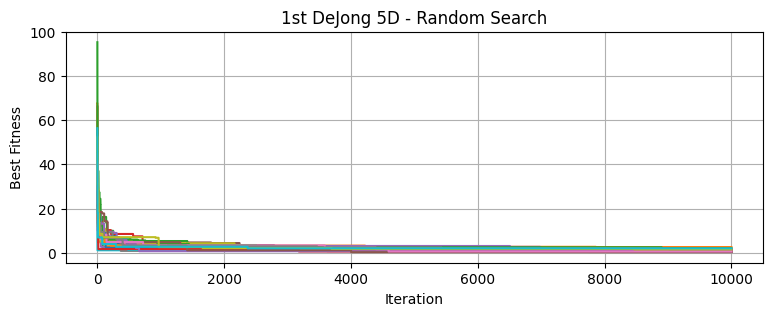

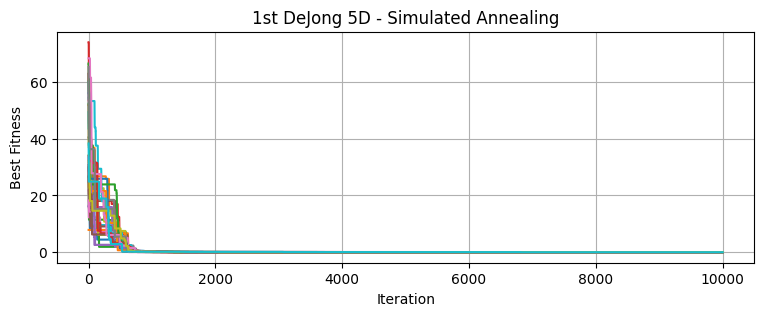

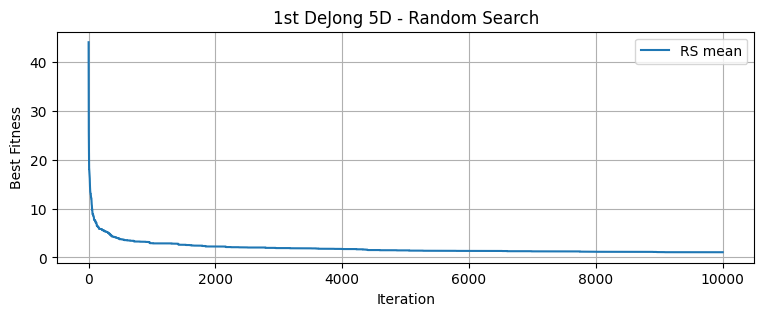

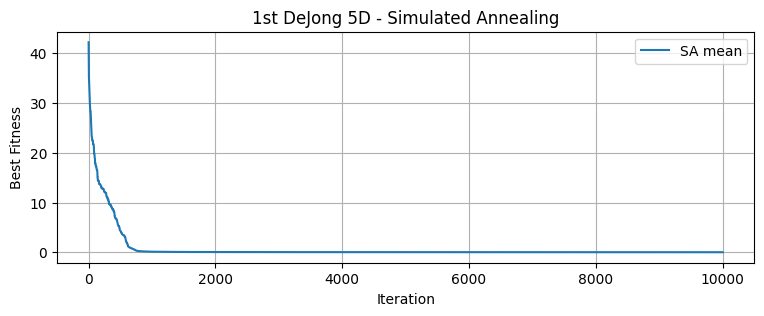

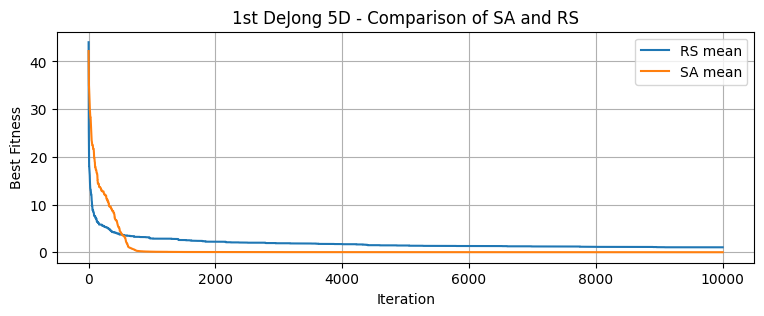

In [84]:
n_iterations = 10000
dimensions = 5
cost_func = dejong1
area_edges = 5.12
n_metropolis = 20
cooling_decr = 0.81
title = "1st DeJong 5D"
comparison(n_iterations, dimensions,cost_func,area_edges,n_metropolis, cooling_decr, title)

## 1st DeJong function 10 Dimensions

+-----------+---------------------+--------------------+--------------------+---------------------+-------------------+
| Algorithm |         MIN         |        MAX         |        MEAN        |        MEDIAN       |      STD_DEV      |
+-----------+---------------------+--------------------+--------------------+---------------------+-------------------+
|     RS    |  3.557311263019837  | 111.35976255906235 | 16.37974783301858  |  15.27837963247104  | 5.583744123784905 |
|     SA    | 0.14652433511744806 | 142.17076047937513 | 1.6641583952990668 | 0.34098503885212633 | 8.112472806651992 |
+-----------+---------------------+--------------------+--------------------+---------------------+-------------------+


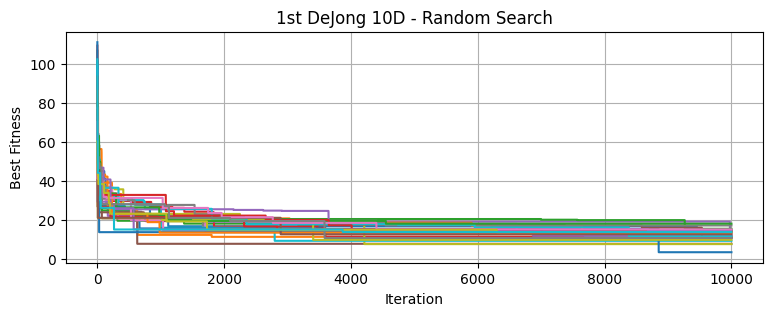

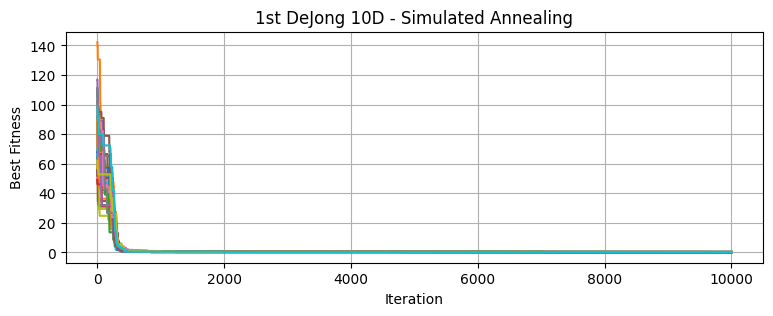

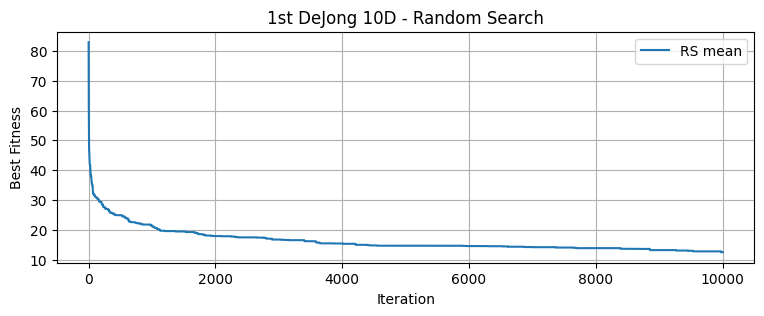

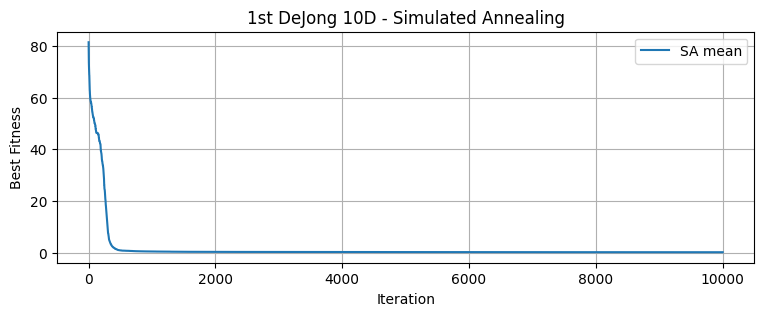

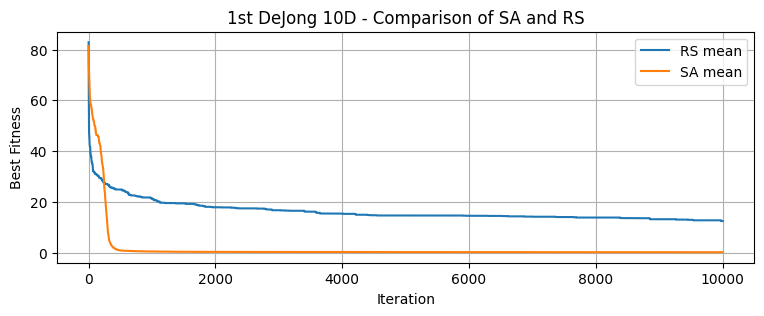

In [63]:
n_iterations = 10000
dimensions = 10
cost_func = dejong1
area_edges = 5.12
n_metropolis = 10
cooling_decr = 0.80
title = "1st DeJong 10D"
comparison(n_iterations, dimensions,cost_func,area_edges, n_metropolis, cooling_decr, title)

## 2nd DeJong function 5D

+-----------+---------------------+-------------------+--------------------+--------------------+-------------------+
| Algorithm |         MIN         |        MAX        |        MEAN        |       MEDIAN       |      STD_DEV      |
+-----------+---------------------+-------------------+--------------------+--------------------+-------------------+
|     RS    |  5.428535673037141  | 6708.085865177877 | 23.364361752548472 | 18.804823462460863 | 41.77215944104895 |
|     SA    | 0.26503897078809396 | 5675.507631141546 | 8.649177132466654  | 1.3838200760015187 | 89.87476197324223 |
+-----------+---------------------+-------------------+--------------------+--------------------+-------------------+


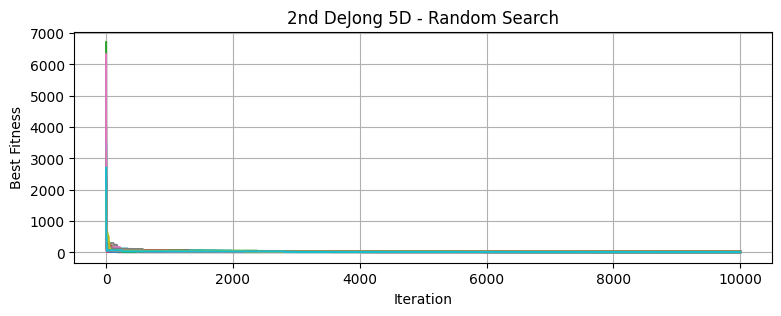

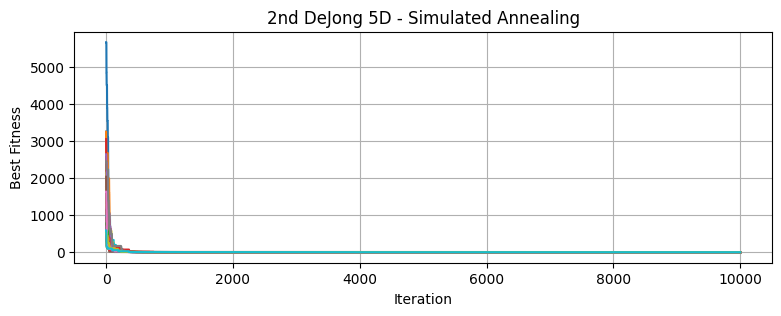

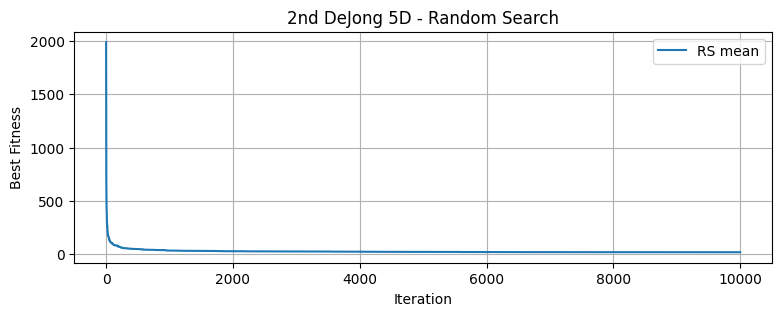

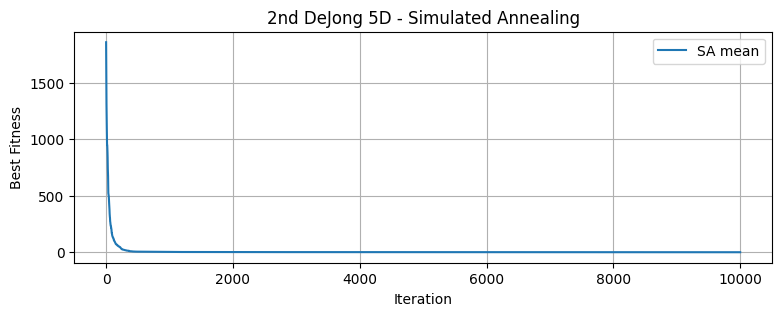

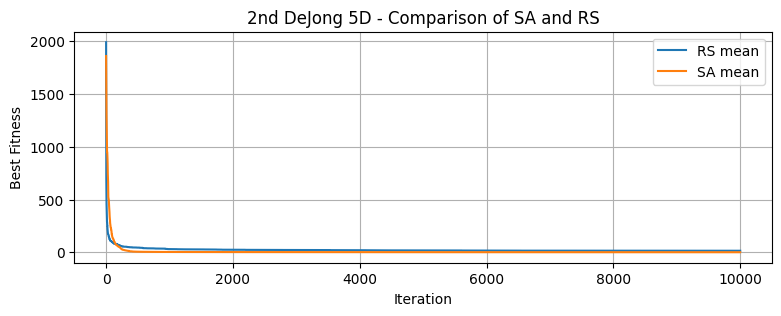

In [85]:
n_iterations = 10000
dimensions = 5
cost_func = dejong2
area_edges = 2.048
n_metropolis = 10
cooling_decr = 0.89
title = "2nd DeJong 5D"
comparison(n_iterations, dimensions,cost_func,area_edges,n_metropolis, cooling_decr, title)

## 2nd DeJong function 10D

+-----------+-------------------+--------------------+--------------------+--------------------+--------------------+
| Algorithm |        MIN        |        MAX         |        MEAN        |       MEDIAN       |      STD_DEV       |
+-----------+-------------------+--------------------+--------------------+--------------------+--------------------+
|     RS    | 96.34030890582221 | 12215.417481846554 | 272.69093617525647 | 245.58746979398745 | 157.72471183143708 |
|     SA    | 8.572654499552709 | 7989.016567220701  |  29.1190645445309  | 12.826374502923976 | 173.99825576688133 |
+-----------+-------------------+--------------------+--------------------+--------------------+--------------------+


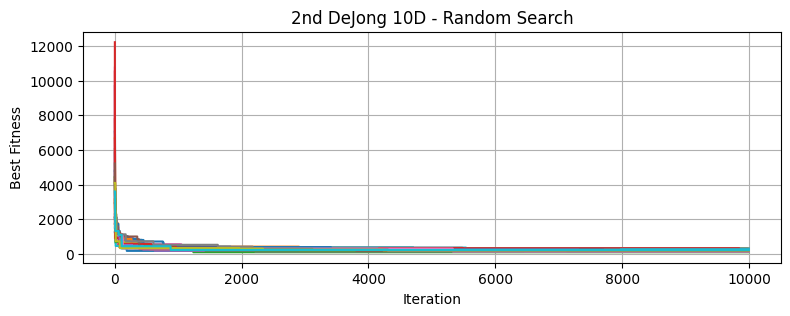

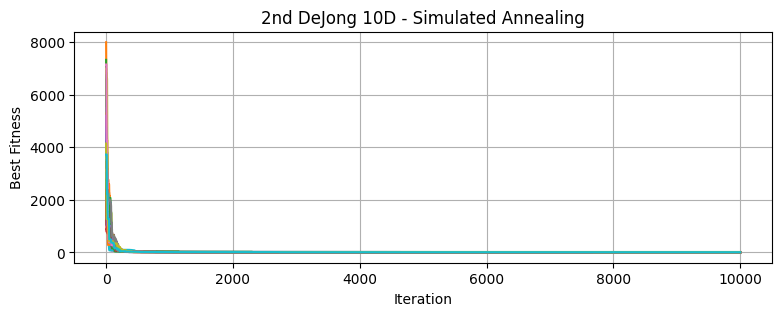

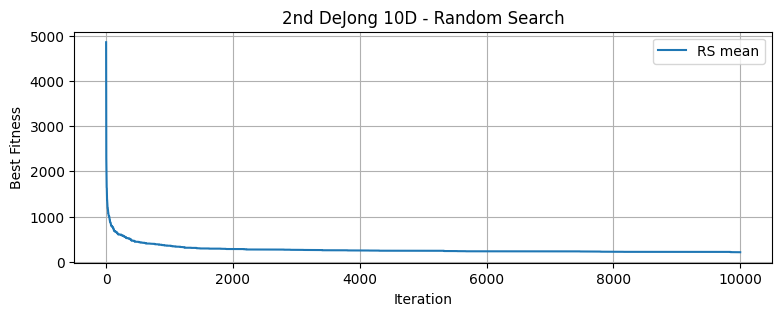

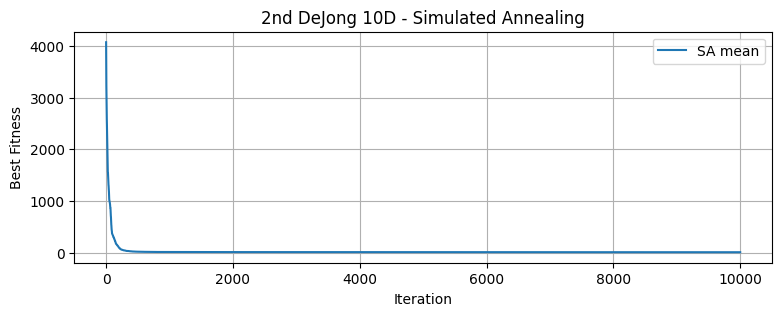

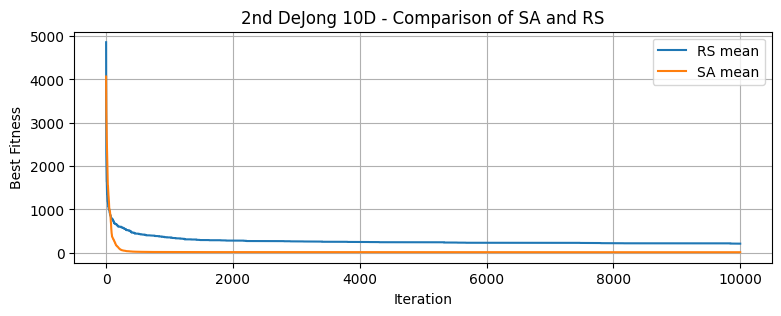

In [86]:
n_iterations = 10000
dimensions = 10
cost_func = dejong2
area_edges = 2.048
n_metropolis = 10
cooling_decr = 0.81
title = "2nd DeJong 10D"
comparison(n_iterations, dimensions,cost_func,area_edges,n_metropolis, cooling_decr, title)

## Schweffel function 5D

+-----------+--------------------+--------------------+-------------------+-------------------+--------------------+
| Algorithm |        MIN         |        MAX         |        MEAN       |       MEDIAN      |      STD_DEV       |
+-----------+--------------------+--------------------+-------------------+-------------------+--------------------+
|     RS    | 230.08923024845126 | 3290.9590197593925 | 579.3403910781713 | 587.6174342537201 | 172.15377180996506 |
|     SA    | 132.3696037444888  | 3257.6282820737265 | 594.2723813973674 |  583.569097963024 | 247.8101009466945  |
+-----------+--------------------+--------------------+-------------------+-------------------+--------------------+


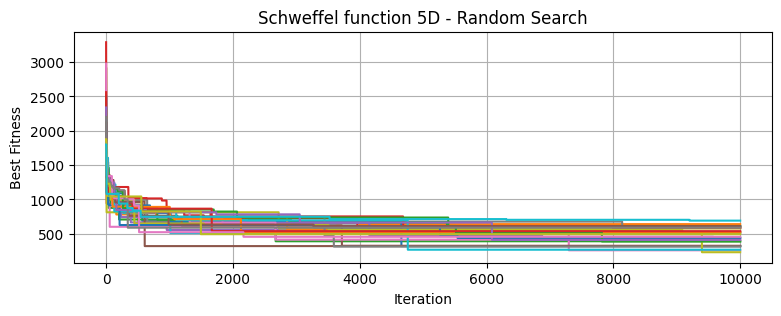

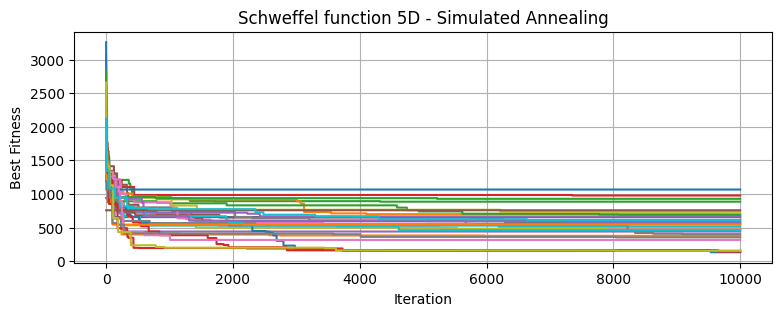

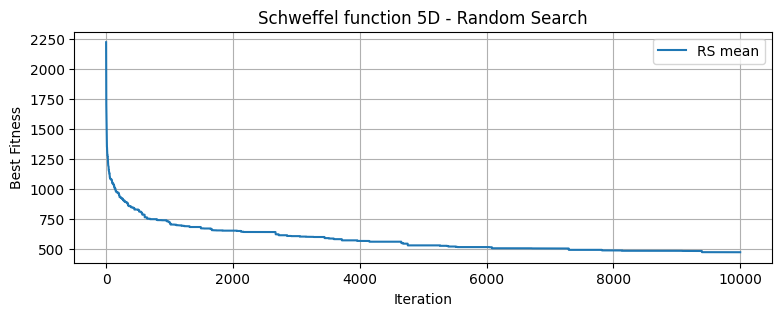

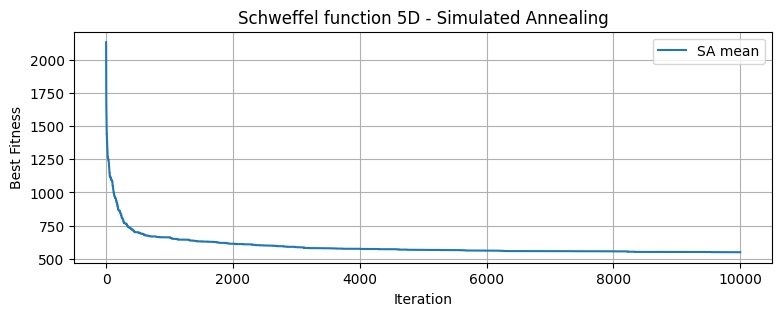

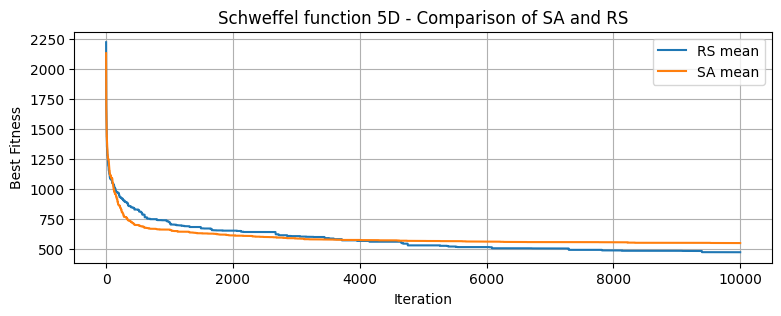

In [89]:
n_iterations = 10000
dimensions = 5
cost_func = schweffel
area_edges = 500
n_metropolis = 10
cooling_decr = 0.91
title = "Schweffel function 5D"
comparison(n_iterations, dimensions, cost_func, area_edges, n_metropolis, cooling_decr, title)

## Schweffel function 10D

+-----------+-------------------+-------------------+--------------------+--------------------+--------------------+
| Algorithm |        MIN        |        MAX        |        MEAN        |       MEDIAN       |      STD_DEV       |
+-----------+-------------------+-------------------+--------------------+--------------------+--------------------+
|     RS    | 1560.007130554447 | 5245.273972769944 | 2005.4717550629186 | 1955.0741373583992 | 263.13934780191255 |
|     SA    | 971.9799283476132 | 5465.166479910345 | 1898.991055771303  |  1929.93603452988  | 380.6118539550527  |
+-----------+-------------------+-------------------+--------------------+--------------------+--------------------+


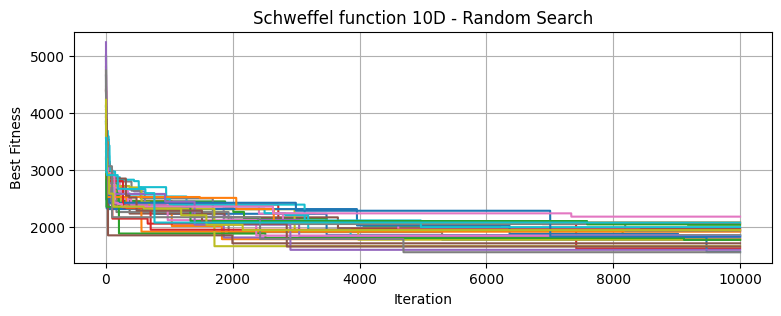

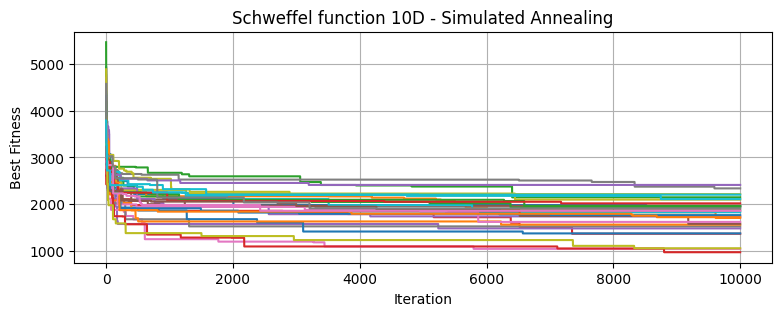

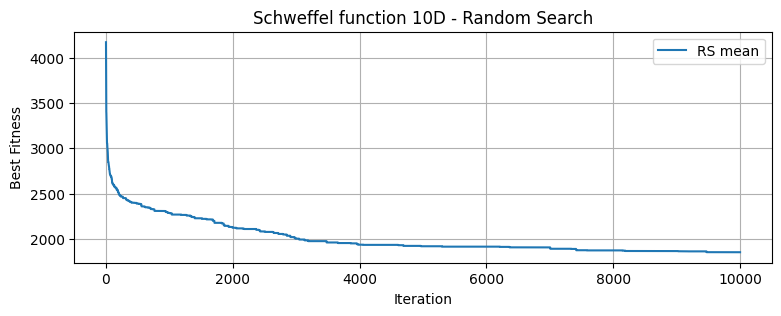

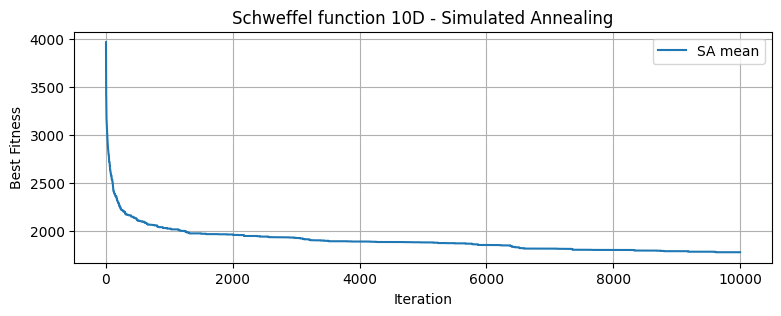

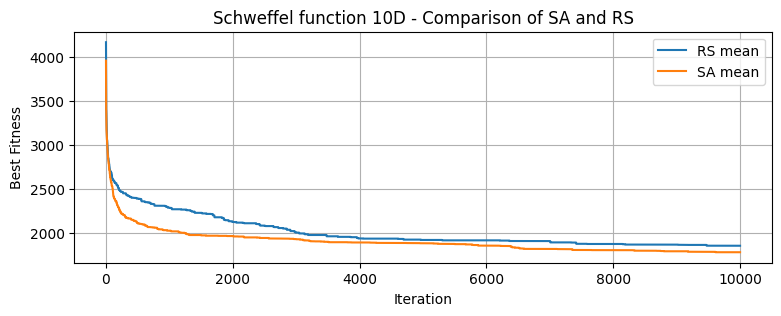

In [80]:
n_iterations = 10000
dimensions = 10
cost_func = schweffel
area_edges = 500
n_metropolis = 10
cooling_decr = 0.81
title = "Schweffel function 10D"
comparison(n_iterations, dimensions,cost_func,area_edges,n_metropolis, cooling_decr, title)